# Partie B: Descente de gradient sur un modèle de régression linéaire

Voici les étapes à suivre pour touver un modèle de régession linéaire:
![image](images/recete.png)

Ici, on va pas travailler avec des matrices! (on va le faire après! Partie C) car ici on peut gérer a et b facilement!

Maintenant considérons le modèle de la régression linéaire
   > **```ŷi = axi + b```**
   
- où (a; b) sont des coefficients de régressions inconnus à estimer, 
- xi, yi les données de régression, 
- Y le vecteur des données des sorties ŷi. 

Dans ce cas, on a les définitions suivantes:
![image](images/etapeB.png)

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
m = 100
x, y = make_regression(n_samples=m, n_features=1, noise=9.9) # données d'apprentissage
x[1:6]

array([[-1.0089507 ],
       [-0.17635597],
       [ 0.67010611],
       [ 0.46030971],
       [-0.29417151]])

In [4]:
y 
print(len(x), len(y))

100 100


In [5]:
x = [item[0] for item in x]
x[1:6]

[-1.008950699249133,
 -0.17635597008879653,
 0.6701061061450477,
 0.46030970909206304,
 -0.2941715072649693]

###### 1. Calcule des dérivées partielles de la fonction E(a, b) selon a et b.

In [6]:
def gradA(x, y, a, b):  
    """ gradient suivant a """
    somme = 0
    for xi, yi in zip(x, y):
        somme += (a*xi + b - yi)*xi
    m = len(x)
    return somme/m

def gradB(x, y, a, b): 
    """ gradient suivant b """
    somme = 0
    for xi, yi in zip(x, y):
        somme += (a*xi + b - yi)
    m = len(x)
    return somme/m

In [7]:
print("gradA:", gradA(x, y, 1, 2))
print("gradA:", gradB(x, y, 1, 2))

gradA: -34.1890206717467
gradA: 1.5076742232311398


###### 2. Implémentation de l’algorithme DG sous Python pour la fonction E(a, b).

In [8]:
def GD(nbrMax, epsilon, alpha, a0, b0, x, y):
    """
    Gradient Descent:
        alpha: learning rate
        epsilon: taux de convergence (quand on doit s'arréter)
        nbrMax: Nombre maximal d'itérations
        x0: x de départ
    """
    a = a0 - alpha * gradA(x, y, a0, b0)
    b = b0 - alpha * gradB(x, y, a0, b0)
    i = 1
    mean_err = (abs(a-a0)+abs(b-b0))/2
    while mean_err > epsilon and i < nbrMax:
        a0 = a; b0 = b
        a = a0 - alpha * gradA(x, y, a0, b0)
        b = b0 - alpha * gradB(x, y, a0, b0)
        i += 1
        mean_err = (abs(a-a0)+abs(b-b0))/2
    return (a, b, i)

In [10]:
def E(a, b, x, y): 
    """ J: fonction coût """
    somme = 0
    for xi, yi in zip(x, y):
        somme += (a*xi + b - yi)**2
    m = len(x)
    return somme/(2*m)

###### 3. La fonction datasets.make_regression
Sur la partie 0. nous avons utilisez la pour générer un problème de régression aléatoire de 100 example avec une seule variable. 
### Appliquation de l’algorithme implémenté au jeu de données généré avec les paramètres suivants :

### On regroupe les questions 3, 4, 5, et 6 (Elles sont géré en même temps)

###### 4. Affichez les coefficients trouvés, ainsi que la valeur de E(amin , bmin ) et le nombre d’itérations.
> Constatation en bas de chaque changement!

###### 5. Importez la fonction stats.linregress de scipy. Utilisez cette fonction pour résoudre le même problème.
>Comparaison et constatation toute en bas!

##### <span style="color:red">• a) Premierement: Approximation avec stats.linregress </span>.

In [13]:
from scipy.stats import linregress

Le minimum en (a= 30.49158415619082 ,b= 0.43487087154362464 ) est:
 E(a, b)= 43.74321724050921


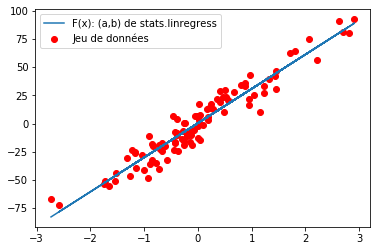

In [14]:
a, b, r_value, p_value, std_err = linregress(x, y)
print("Le minimum en (a=", a,",b=", b, ") est:\n E(a, b)=", E(a, b, x, y))
plt.scatter(x,y, label="Jeu de données", c = 'r')
plt.plot(x, [(a*xx+b) for xx in x], label="F(x): (a,b) de stats.linregress")
plt.legend()
plt.show()

##### <span style="color:red">• b) Ensuite: Approximation avec stats.linregress </span>.
###### <span style="color:green">• η = 0.001, nombremax = 100 </span>.

Le minimum en (aMin= 4.229933247670198 ,bMin= 1.8561502389305133 ) est:
 E(aMin, bMin)= 444.47918641628894
Nombre d'iterations: 100


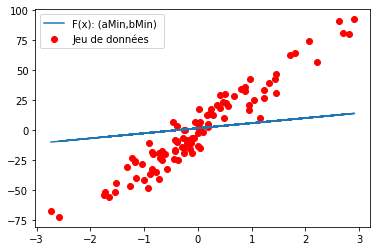

In [15]:
aMin, bMin, nbr_Iter= GD(nbrMax=100, epsilon=0.001, alpha=0.001, a0=1, b0=2, x=x, y=y)
print("Le minimum en (aMin=", aMin,",bMin=", bMin, ") est:\n E(aMin, bMin)=", E(aMin, bMin, x, y))
print("Nombre d'iterations:", nbr_Iter)
plt.scatter(x,y, label="Jeu de données", c = 'r')
plt.plot(x, [(aMin*xx+bMin) for xx in x], label="F(x): (aMin,bMin) ")
plt.legend()
plt.show()

Mauvais Modèle!
###### <span style="color:green">• η = 0.001, nombremax = 500 </span>. 

Le minimum en (aMin= 13.978863857301315 ,bMin= 1.4006937405064475 ) est:
 E(aMin, bMin)= 202.24312736607618
Nombre d'iterations: 500


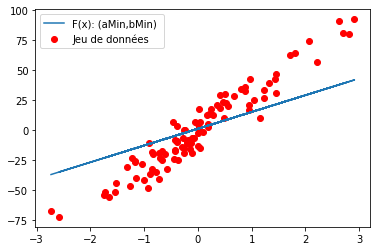

In [16]:
aMin, bMin, nbr_Iter= GD(nbrMax=500, epsilon=0.001, alpha=0.001, a0=1, b0=2, x=x, y=y)
print("Le minimum en (aMin=", aMin,",bMin=", bMin, ") est:\n E(aMin, bMin)=", E(aMin, bMin, x, y))
print("Nombre d'iterations:", nbr_Iter)
plt.scatter(x,y, label="Jeu de données", c = 'r')
plt.plot(x, [(aMin*xx+bMin) for xx in x], label="F(x): (aMin,bMin) ")
plt.legend()
plt.show()

On constate que quand le nombre d'iterations augument le modèle devient plus performant! mais encore: Mauvis modèle!
###### <span style="color:green">• η = 0.001, nombremax = 1000 </span>. 

Le minimum en (aMin= 21.245847130997102 ,bMin= 1.029910540875861 ) est:
 E(aMin, bMin)= 93.46372371153892
Nombre d'iterations: 1000


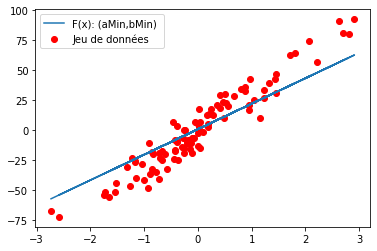

In [17]:
aMin, bMin, nbr_Iter= GD(nbrMax=1000, epsilon=0.001, alpha=0.001, a0=1, b0=2, x=x, y=y)
print("Le minimum en (aMin=", aMin,",bMin=", bMin, ") est:\n E(aMin, bMin)=", E(aMin, bMin, x, y))
print("Nombre d'iterations:", nbr_Iter)
plt.scatter(x,y, label="Jeu de données", c = 'r')
plt.plot(x, [(aMin*xx+bMin) for xx in x], label="F(x): (aMin,bMin) ")
plt.legend()
plt.show()

On constate que quand le nombre d'iterations augument le modèle devient plus performant! mais encore: Mauvis modèle!
###### <span style="color:green">• η = 0.01, nombremax = 1000 </span>. 

Le minimum en (aMin= 30.338155647838217 ,bMin= 0.4537008081912936 ) est:
 E(aMin, bMin)= 43.75703502273515
Nombre d'iterations: 451


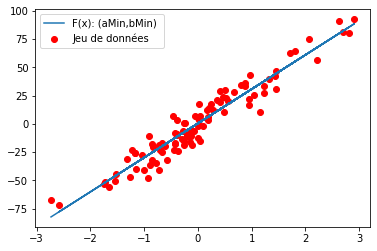

In [18]:
aMin, bMin, nbr_Iter= GD(nbrMax=1000, epsilon=0.001, alpha=0.01, a0=1, b0=2, x=x, y=y)
print("Le minimum en (aMin=", aMin,",bMin=", bMin, ") est:\n E(aMin, bMin)=", E(aMin, bMin, x, y))
print("Nombre d'iterations:", nbr_Iter)
plt.scatter(x,y, label="Jeu de données", c = 'r')
plt.plot(x, [(aMin*xx+bMin) for xx in x], label="F(x): (aMin,bMin) ")
plt.legend()
plt.show()

On constate que l'augumentation de la distance de la descent modifier la péformance de modèle! 

Plus au moins, bon modèle!
###### <span style="color:green">• η = 1, nombremax = 1000 </span>. 

Le minimum en (aMin= 40.31866992090743 ,bMin= -0.28561474150742405 ) est:
 E(aMin, bMin)= [[32.4946631]]
Nombre d'iterations: 5


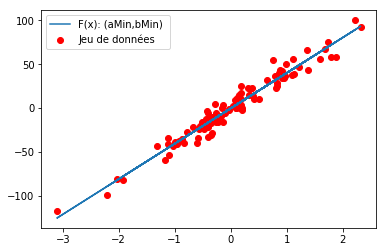

In [47]:
aMin, bMin, nbr_Iter= GD(nbrMax=1000, epsilon=0.01, alpha=1, a0=1, b0=2, x=x, y=y)
print("Le minimum en (aMin=", aMin,",bMin=", bMin, ") est:\n E(aMin, bMin)=", E(aMin, bMin, x, y))
print("Nombre d'iterations:", nbr_Iter)
plt.scatter(x,y, label="Jeu de données", c = 'r')
plt.plot(x, [(aMin*xx+bMin) for xx in x], label="F(x): (aMin,bMin) ")
plt.legend()
plt.show()

Très bon modèle! on a augumenter la distance (learning rate)!
###### 5. Comparaison des résultats obtenues!
On comparant entre le résultat de la partie a) et le dérnier résultat de la partie b), on trouve une similarité plus au moins 
parfaite!
###### 5. Que constatez-vous ?
On constate que l'implémentation donne des résultats similaire à la fonction ```linregress``` une fois les bons paramètre sont fixés!
###### 6. Visualisez le jeu de données généré avec les fonctions approximatives obtenues en utilisant les deux méthodes.
> voir figures!

# <p style="text-align: center">Merci pour votre lecture!</p>